In [5]:
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import causalimpact

# Ensure compatibility with TensorFlow 2.x
tf.compat.v1.enable_v2_behavior()

tfd = tfp.distributions


In [2]:
DATA_SEED = (0, 1)
NOISE_SEED = (1, 2)

rv = tfp.sts.AutoregressiveMovingAverageStateSpaceModel(
    num_timesteps=100,
    ar_coefficients=[0.999],
    ma_coefficients=[],
    level_scale=1., 
    initial_state_prior=tfd.MultivariateNormalDiag([0.], [1.])
)

x1 = (100. + rv.sample(seed=DATA_SEED))[..., 0]
y = 1.2 * x1 + tfd.Normal(0., 1.).sample(100, seed=NOISE_SEED)

y = tf.where(tf.range(0, y.shape[0]) <= 71, y, y + 10.)

data = pd.DataFrame(data={'y': y.numpy(), 'x1': x1.numpy()},
                    index=pd.date_range('2021-06-14', '2021-09-21'))

print(data.head())

                     y          x1
2021-06-14  118.798439   98.545265
2021-06-15  120.166534   99.965958
2021-06-16  120.969421  100.746544
2021-06-17  123.130760  102.570267
2021-06-18  122.162979  102.887138


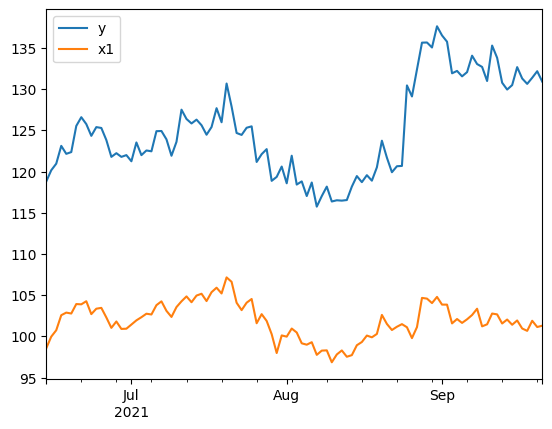

In [3]:
data.plot.line()
plt.show()

In [6]:
pre_period = (data.index[0], data.index[70])
post_period = (data.index[71], data.index[-1])

impact = causalimpact.fit_causalimpact(
    data=data,
    pre_period=pre_period,
    post_period=post_period)
     

In [7]:
causalimpact.plot(impact)

alt.FacetChart(...)

In [8]:
print(causalimpact.summary(impact, output_format='summary'))


Posterior Inference {CausalImpact}
                          Average            Cumulative
Actual                    132.3              3837.4
Prediction (s.d.)         122.6 (0.32)       3555.4 (9.41)
95% CI                    [122.0, 123.3]     [3538.3, 3574.8]

Absolute effect (s.d.)    9.7 (0.32)         282.0 (9.41)
95% CI                    [9.1, 10.3]        [262.5, 299.1]

Relative effect (s.d.)    7.9% (0.3%)        7.9% (0.0%)
95% CI                    [7.3%, 8.5%]       [7.3%, 8.5%]

Posterior tail-area probability p: 0.001
Posterior prob. of a causal effect: 99.89%

For more details run the command: summary(impact, output_format="report")


c:\Users\shiva\Anaconda3\envs\myenv\lib\site-packages\causalimpact\summary.py:149: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = ci_model.summary["p_value"][0]


In [9]:
print(causalimpact.summary(impact, output_format='report'))


Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 132.3. By contrast, in the absence of an
intervention, we would have expected an average response of 122.6.
The 95% interval of this counterfactual prediction is [122.0, 123.3].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 9.7 with a 95% interval of
[9.1, 10.3]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3837.4.
By contrast, had the intervention not taken place, we would have expected
a sum of 3555.4. The 95% interval of this prediction is [3538.3, 3574.8].


The above results are given in terms of absolute numbers. In relative
terms, the response variable s

c:\Users\shiva\Anaconda3\envs\myenv\lib\site-packages\causalimpact\summary.py:149: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = ci_model.summary["p_value"][0]


In [10]:
pre_period = (data.index[0], data.index[70])
post_period = (data.index[71], data.index[-1])

In [11]:
pre_period = (0, 70)
post_period = (71, 99)

In [12]:
pre_period = ('2021-06-14', '2021-08-23')
post_period = ('2021-08-24', '2021-09-21')